In [8]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)



# Logical AND Problem


<IPython.core.display.Latex object>

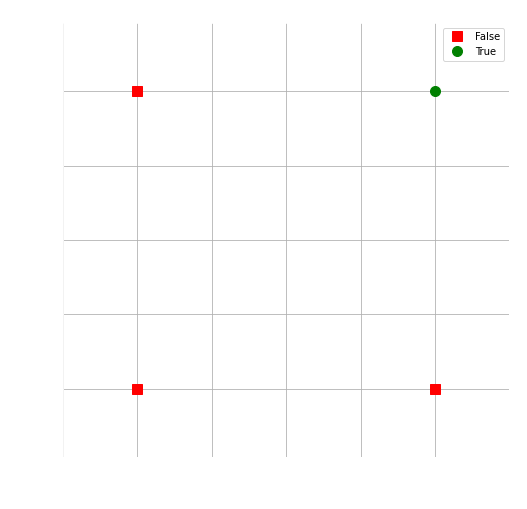

In [10]:
from IPython.display import Latex, HTML, Markdown
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

data = [(np.array([False, False]), False),
        (np.array([True, False]), False),
        (np.array([False, True]), False),
        (np.array([True, True]), True)]


fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

def plot_problem():
    for sample in data:
        sample_input = sample[0].astype(int)
        ground_truth = sample[1]

        if ground_truth: # If output is True
            sample_marker = 'o'
            sample_color = 'green'
        else:
            sample_marker = 's'
            sample_color = 'red'

        plt.plot(sample_input[0],
                sample_input[1],
                sample_marker,
                color=sample_color,
                markersize=10,
                label=ground_truth)
    plt.axis('equal')
    limits = [-.25, 1.25, -.25, 1.25]
   
    plt.grid()
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    handles, labels = ax.get_legend_handles_labels()
    legends = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*legends))
    plt.title('Logical AND')

    ticks = np.arange(limits[0], 2*limits[1], .25)
    tick_labels = [str(tick) for tick in ticks]
    tick_labels[np.where(ticks == 0)[0][0]] += '\n(False)'
    tick_labels[np.where(ticks == 1)[0][0]] += '\n(True)'
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)
    plt.axis(limits)

    label_color = 'white'
    ax.set_title(ax.get_title(), color=label_color)
    
    [ax.spines[spine].set_color(label_color) for spine in ax.spines]
    ax.xaxis.label.set_color(label_color)
    ax.yaxis.label.set_color(label_color)
    ax.tick_params(axis='x', colors=label_color)
    ax.tick_params(axis='y', colors=label_color)


    return legends


plot_problem()

Latex('''
We have the data
\\begin{align}
\\mathbf{x_i} &\in \\left\\{
\\begin{pmatrix} false\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ true\\end{pmatrix}
\\right\\}, \\\ 
&= \\left\\{
\\begin{pmatrix} 0\\\ 0\\end{pmatrix},
\\begin{pmatrix} 1\\\ 0\\end{pmatrix},
\\begin{pmatrix} 0\\\ 1\\end{pmatrix},
\\begin{pmatrix} 1\\\ 1\\end{pmatrix}
\\right\\} \\\ \\\ 
t_i &\in \\left\\{false, false, false, true
\\right\\} \\\ 
&= \\left\\{0, 0, 0, 1\\right\\}.
\\end{align}
where $\\mathbf{x_i}$ is an input sample and $z_i$ is the corresponding output target.
''')


# Solving the problem geometrically

<IPython.core.display.Latex object>

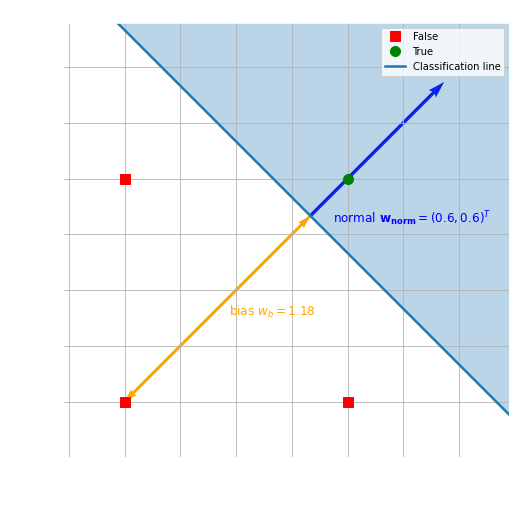

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

def plot_classification(weights):
    
    normal = np.atleast_2d(weights[:2]).T
    bias = -weights[-1]/np.linalg.norm(normal)
    legends = plot_problem()
    
    bias_vec = bias * normal / np.linalg.norm(normal)
    plt.quiver(bias_vec[0], bias_vec[1], normal[0], normal[1], color='b', angles='xy', scale_units='xy', scale=1)
    plt.text(bias_vec[0]+.1, bias_vec[1]-.03, r"normal $\mathbf{w_{norm}} = (%s, %s)^T$"%(np.round(normal[0][0], 2), np.round(normal[1][0], 2)), color='b', fontsize=12)

    plt.quiver(0, 0, bias_vec[0], bias_vec[1], color='orange', angles='xy', scale_units='xy', scale=1, width=.006)
    plt.quiver(bias_vec[0], bias_vec[1], -bias_vec[0], -bias_vec[1], angles='xy', scale_units='xy', scale=1, color='orange', width=.006)
    plt.text(bias_vec[0]/2+.05, bias_vec[1]/2-.03, r"bias $w_b = %s$"%(np.round(bias, 2)), color='orange', fontsize=12)

    # Parameterization
    x_lim = 2*(normal[0]/normal[1] + bias)
    t = np.arange(-x_lim, x_lim, 1)
    line_direction = np.array([normal[1], -normal[0]])
    classification_line = line_direction * t + bias_vec 
    classification_plot = plt.plot(classification_line[0], classification_line[1], linewidth=2.5)
    plt.fill_between(classification_line[0], classification_line[1], np.max(classification_line[1]), alpha=.3,)

    legends.append((classification_plot[0], 'Classification line'))
    plt.legend(*zip(*legends))
    plt.axis([-.25, 1.7, -.25, 1.7])

bias = 1.
normal = np.atleast_2d([.6, .6]).T
weights = np.append(normal, -bias)

plot_classification(weights)

Latex('''

To solve the problem geomerically, lets define a classification line with normal respectively bias
\\begin{align*}
\\mathbf{w_{norm}} &= \\begin{pmatrix} 0.6 \\\ 0.6\\end{pmatrix},\\\ 
w_b &= 1
\\end{align*}
''')
    

In [16]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
    ["resetEquationNumbers", MathJax.InputJax.TeX],
    ["PreProcess", MathJax.Hub],
    ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

<IPython.core.display.Latex object>

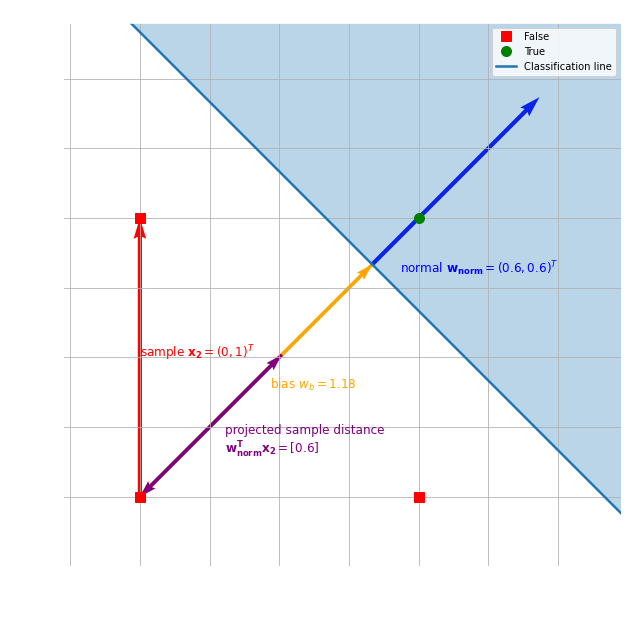

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()


plot_classification(weights)


sample_index = 2
sample = data[sample_index][0].astype(int)

plt.quiver(0, 0, sample[0], sample[1], color='r', angles='xy', scale_units='xy', scale=1)
projected_sample_distance = normal.T @ sample
projected_sample = projected_sample_distance * np.sqrt(2)* normal
plt.text(sample[0]/2, sample[1]/2, r"sample $\mathbf{x_%s} = (%s, %s)^T$"%(sample_index, sample[0], sample[1]), color='red', fontsize=12)

plt.quiver(0, 0, projected_sample[0], projected_sample[1], color='purple', angles='xy', scale_units='xy', scale=1,width=.006)
plt.quiver(projected_sample[0], projected_sample[1], -projected_sample[0], -projected_sample[1], color='purple', angles='xy', scale_units='xy', scale=1, width=.006)
plt.text(projected_sample[0]/2+.05, projected_sample[1]/2-.1, r"projected sample distance"'\n'
"$\mathbf{w_{norm}^T} \mathbf{x_2} = %s$"%projected_sample_distance, color='purple', fontsize=12)


Latex('''
Consider some sample e.g. $\\mathbf{x_2}$ 

Projecting it onto $\mathbf{w_{norm}}$, and subtracting with the bias $w_b$ gives weighted sum

\\begin{align}
s_2 &= \\mathbf{w_{norm}^T} \\mathbf{x_2} - w_b \\\ 
&= \\begin{pmatrix} w_1 & w_2\\end{pmatrix} \\begin{pmatrix} x_1\\\ x_2\\end{pmatrix} - w_b \\\ 
&= \\underbrace{\\begin{pmatrix} 0.6 & 0.6 \\end{pmatrix} \\begin{pmatrix} 0 \\\ 1 \\end{pmatrix}}_{0.6} - 1 \\\ 
&= -0.4
\\end{align}

that is, the distance to the classification line. Finally, let the prediction

\\begin{equation}
y = a(s) = \\begin{cases} 1, \\text{ if } s \\geq 0,\\\ 0 \\text{ otherwise}
\\end{cases}
\\end{equation}

determine the classification. Sample $\\mathbf{x_2}$ would thus be predicted as
\\begin{equation}
y_2 = a(s_2) = \\left\\{s_2 = -0.4 \\ngeq 0 \\right\\} = 0, 
\\end{equation}
that is $false$, as expected.
''')


In [17]:

Latex('''
Lets instead classify sample $\\mathbf{x_4} = \\begin{pmatrix} 1\\\ 1\\end{pmatrix}.$
The weighted sum

\\begin{align}
s_3 &= \\mathbf{w_{norm}^T} \\mathbf{x_3} - w_b 
= \\underbrace{\\begin{pmatrix} 0.6 & 0.6 \\end{pmatrix} \\begin{pmatrix} 1 \\\ 1 \\end{pmatrix}}_{1.2} - 1 \\\ 
&= 0.2 \\geq 0 \\\ 
\\implies
y_3 &= 1
\\end{align} 
that is $true$, also as expected.
''')


<IPython.core.display.Latex object>

# Bringing in Neural Networks

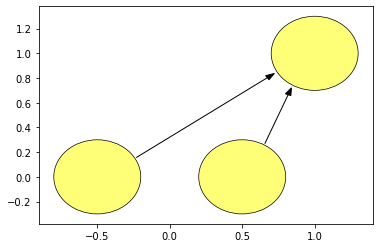

In [93]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow


def draw_feed_forward(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['x^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.input'] #+ ['nn.hidden'] * num_hidden_layer + ['nn.recurrent']
    radius_list = [.5] + [.5]#[1.2] + [0.035] * num_hidden_layer + [0.7]
    x_list = 1 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, x in zip(num_node_list, kind_list, radius_list, x_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(x, x)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    d = DynamicShow((10, 6))
    draw_feed_forward(d.ax, num_node_list=[2, 1])
        
#mpo21 = NodeBrush(, size='normal')
#mpo21.size = (0.7, 0.3)
#node3 = mpo21 >> (1.5, 1.0)
#left_bottom_pin = node3.pin('bottom', align=node1)
#edge >> (left_bottom_pin, node1)
real_bp()



In [135]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize = (12,9))

From = [r'$x_1$', r'$x_2$']
To = ['y', 'y']

df = pd.DataFrame({ 'from':From,
                   'to':To})

pos = {r'$x_1$':(1,1),
       r'$x_2$':(1,2),
       'y':(2,1.5)}

# Define Node Colors
NodeColors = {r'$x_1$':[1,0,1],
        r'$x_2$':[1,1,0],
             'y':[1,1,0]}

Labels = {}
i = 0
for a in From:
    Labels[a]=a
    i +=1
Labels[To[-1]]=To[-1]
print(Labels)
# Build your graph. Note that we use the DiGraph function to create the graph! This adds arrows
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

# Define the colormap and set nodes to circles, but the last one to a triangle
Circles = []
Colors = []
for n in G.nodes:
    Circles.append(n)

# By making a white node that is larger, I can make the arrow "start" beyond the node
nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1.e4,
                       node_shape='o',
                       node_color='orange',
                       alpha=1.)


nx.draw_networkx_labels(G, pos, Labels, font_size=12)

# Again by making the node_size larer, I can have the arrows end before they actually hit the node
edges = nx.draw_networkx_edges(G, pos, node_size=1.e4,
                               arrowstyle='->',width=2)

plt.xlim(0,3)
plt.ylim(0,3)

plt.axis('off')
plt.show()

TypeError: list indices must be integers or slices, not str

<Figure size 864x648 with 0 Axes>


<img src="Figures/neuron.jpg" alt="fishy" class="bg-primary mb-1" width="400px">


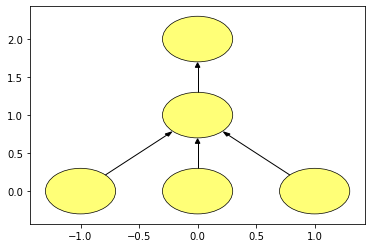

In [15]:
real_bp()

Markdown('''
<img src="Figures/neuron.jpg" alt="fishy" class="bg-primary mb-1" width="400px">
''')

In [75]:
import tikzmagic


In [76]:

%%tikz
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);


FileNotFoundError: [Errno 2] No such file or directory: 'convert'

In [ ]:
Latex('''
\\begin{figure}[htbp] 
\centering 
{
\\begin{subfigure}[t]{.9\\textwidth}
    \\centering
    \\includegraphics[width=.9\\textwidth]{Figures/neuron.jpg}
    \\caption{Anatomy of a biological neuron showing synaptic connections, where it is hypothesized that memory is stored. Nerve impulses received from these synapses propagates through the neuron to the synaptic end terminals. Image is from Figure 12.22 in Anatomy \\& Physiology.}
\end{subfigure}\\

}
\\caption{Illustrated comparison between a biological neuron and an artificial neuron.}
\\label{fig:neuron} 
\\end{figure}
''')

In [ ]:
np.random.seed(0)
normal =  np.random.rand(2)
bias =  -np.random.rand(1)
weights = np.append(normal, bias)
print(weights)
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
plot_classification(weights)

sample_index = 2
sample = data[sample_index][0].astype(int)

plt.quiver(0, 0, sample[0], sample[1], color='r', angles='xy', scale_units='xy', scale=1)
projected_sample_distance = np.asscalar(normal.T @ sample)
projected_sample = projected_sample_distance * np.sqrt(2)* normal
plt.text(sample[0]/2, sample[1]/2-.05, r"sample $\mathbf{x_%s} = (%s, %s)^T$"%(sample_index, sample[0], sample[1]), color='red', fontsize=12)

#s_1 = weights.T * 
print(sample)
print(np.append(sample, 1))
print(sum(weights * np.append(sample, 1)))

Latex('''
How to choose weights? Could sample these random, e.g.  $\\mathbf{w} = \\begin{pmatrix} %s \\\ %s \\\ %s\\end{pmatrix}.$
This will incorrectly classify sample 

\\begin{align}
\\mathbf{x_1} &= \\begin{pmatrix} 1\\\ 0\\end{pmatrix} \\\ 
\\implies 
y_1 &= a\\left(\\underbrace{\\begin{pmatrix}%s & %s & %s\\end{pmatrix} \\begin{pmatrix} 1 \\\ 0 \\\ 1 \\end{pmatrix}}_{0.11}\\right) \\\ 
&= 1 
\\end{align} 
that is $true$, while its target $z_1 = false$.
'''%tuple(np.round(np.tile(weights, 2), 2)))


In [ ]:
w = np.array([2, 2])
Latex('''
Let quantify what it means to be wrong, using e.g. squared error as a loss function

\\begin{equation}
    \\mathcal{L} =  \\left(y_i - z_i\\right)^2 %s %s %s %s
\\end{equation}
'''%tuple([w[:]]))